In [28]:
import csv
from sklearn import svm
import numpy as np
import Loader
import tensorflow as tf
import Transformer
import ModelFile
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.losses import MeanSquaredError
plt.rcParams['font.family'] = 'serif'

compoundsTrain, smilesTrain, labelsTrain, compoundDataTrain, activitiesTrain = Loader.getTrain(defaultValue=0)
compoundsTest, smilesTest, labelsTest, compoundDataTest, activitiesTest = Loader.getTest(defaultValue=0)
compoundsValidate, smilesValidate, labelsValidate, compoundDataValidate, activitiesValidate = Loader.getValidate(defaultValue=0)

#all the data manipulation is normalizing and determining the binary classification
trainData, testData, valData = Transformer.normalizeData(compoundDataTrain, compoundDataTest, 
                                                         compoundDataValidate, newMean=0, newStd=1)

trainClass = Transformer.toBinaryClassification(activitiesTrain)
testClass = Transformer.toBinaryClassification(activitiesTest)
valClass = Transformer.toBinaryClassification(activitiesValidate)

In [7]:
!jt -t chesterish -T

In [17]:
regrNNCombo = ModelFile.load("comboRegrNN.h5")
regrSVRCombo = ModelFile.load("comboRegrSVR.pkl")
regrSVM = ModelFile.load("comboRegrSVM.pkl")
regrSVR = ModelFile.load("svrRegr1.pkl")

def evalData(inputData, svmModel, svrModel, zeroGuess=0): #given the models and data points evaluate
    finalPred = np.ones(len(inputData))*zeroGuess #how many predictions we should have
    binaryClass = svmModel.predict(inputData)
    
    regrPredict = svrModel.predict(inputData[binaryClass == 1]) #regression high activity prediction
    finalPred[binaryClass == 1] = regrPredict #set the high activity guesses, otherwise 0
    return finalPred

def evalData2(inputData, svmModel, nnModel, zeroGuess=0): #same as above but use NN for regr
    finalPred = np.ones(len(inputData))*zeroGuess #how many predictions we should have
    binaryClass = svmModel.predict(inputData)
    
    regrPredict = nnModel.predict(inputData[binaryClass == 1]).flatten() #high activity regr predict
    finalPred[binaryClass == 1] = regrPredict #set the high activity guesses, otherwise 0
    return finalPred

Model Description: 
See Regression Models (SVR and NN) code file. Used for a combo regression model, svm used for binary classification, then either SVR or NN for regression of high activity model. Use constant guess of about .7 for best mean square error. This is the NN Portion for regr of high activity.
Model Description: 
See Regression Models (SVR and NN) code file. Used for a combo regression model, svm used for binary classification, then either SVR or NN for regression of high activity model. Use constant guess of about .7 for best mean square error. This is the SVR option for regr of high activity.
Model Description: 
See Regression Models (SVR and NN) code file. Used for a combo regression model, svm used for binary classification, then either SVR or NN for regression of high activity model. Use constant guess of about .7 for best mean square error. This is the SVM Portion.
Model Description: 
Regression SVR, Ein Error:  0.3554315571414324Eval Error:  2.215028194809491. See Re

In [18]:
trainAcc1 = mean_squared_error(regrSVR.predict(trainData),activitiesTrain)
valAcc1 = mean_squared_error(regrSVR.predict(valData),activitiesValidate)
testAcc1 = mean_squared_error(regrSVR.predict(testData),activitiesTest)

print("Regr SVR: ")
print("\ttrain Error: ", trainAcc1)
print("\tval Error: ", valAcc1)
print("\ttest Error: ", testAcc1)

trainAcc2 = mean_squared_error(evalData(trainData,regrSVM,regrSVRCombo),activitiesTrain)
valAcc2 = mean_squared_error(evalData(valData,regrSVM,regrSVRCombo),activitiesValidate)
testAcc2 = mean_squared_error(evalData(testData,regrSVM,regrSVRCombo),activitiesTest)

print("\nCombo SVM+SVR: ")
print("\ttrain Error: ", trainAcc2)
print("\tval Error: ", valAcc2)
print("\ttest Error: ", testAcc2)

trainAcc3 = mean_squared_error(evalData2(trainData,regrSVM,regrNNCombo),activitiesTrain)
valAcc3 = mean_squared_error(evalData2(valData,regrSVM,regrNNCombo),activitiesValidate)
testAcc3 = mean_squared_error(evalData2(testData,regrSVM,regrNNCombo),activitiesTest)

print("\nCombo SVM+NN: ")
print("\ttrain Error: ", trainAcc3)
print("\tval Error: ", valAcc3)
print("\ttest Error: ", testAcc3)

Regr SVR: 
	train Error:  0.3554315915812217
	val Error:  2.2150281861077232
	test Error:  1.7680663855523495

Combo SVM+SVR: 
	train Error:  0.1838811739179755
	val Error:  2.3774471417832355
	test Error:  1.9265646733428843

Combo SVM+NN: 
	train Error:  0.22029684411377534
	val Error:  2.4543512504366056
	test Error:  2.0241972394391046


<Figure size 1296x576 with 0 Axes>

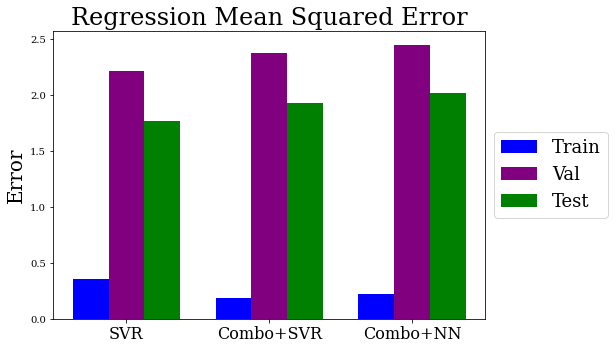

In [33]:
X = np.arange(3)
fig = plt.figure(figsize=(18,8),facecolor=(1, 1, 1))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(X+.25, [trainAcc1, trainAcc2, trainAcc3], color="blue",  width=.25, label="Train")
ax.bar(X+.5, [valAcc1, valAcc2, valAcc3],        color="purple", width=.25, label="Val")
ax.bar(X+.75, [testAcc1, testAcc2, testAcc3],    color="green",   width=.25, label="Test")

ax.set_title("Regression Mean Squared Error", fontsize=24)
#ax.set_xlabel("Model", fontsize=20)
ax.set_ylabel("Error", fontsize=20)
ax.set_xticks([.5, 1.5, 2.5])
ax.set_xticklabels(["SVR", "Combo+SVR", "Combo+NN"], fontsize=16)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)

plt.savefig("../Figures/RegressionBar.jpg", bbox_inches='tight')

## Classification figure

In [36]:
basicNN = ModelFile.load("basicNN.h5")
basicSVM = ModelFile.load("basicSVM.pkl")
timSVM = ModelFile.load("TSVM.pkl")

#regrSVRCombo = ModelFile.load("comboRegrSVR.pkl")
#regrSVM = ModelFile.load("comboRegrSVM.pkl")
#regrSVR = ModelFile.load("svrRegr1.pkl")

def aggregate(predictions):
    yAggregate = np.zeros(len(predictions[0]))
    for prediction in predictions:
        yAggregate += prediction
    return 1 * np.array(yAggregate > (len(predictions) / 2))

def getAccuracy(predict, actual):
    return sum(predict == actual)/len(actual) #accuracy

Model Description: 
Dense Neural Network without PCA. This model was generated in the Full Model Testing file.
Model Description: 
Newest SVM without PCA. This model was generated in the Full Model Testing file.
Model Description: 
Tim's state of the art feature reduction SVM. This model was generated in the Full Model Testing file. Features follows as comma separated list: peoe_vsa12,fr_aniline,slogp_vsa12,peoe_vsa9,fr_nh1,fpdensitymorgan1,balabanj,estate_vsa9,smr_vsa4,smr_vsa9,peoe_vsa13,smr_vsa5,bcut2d_chglo,fr_oxazole,slogp_vsa6,fr_alkyl_halide,fr_piperzine,numaromaticcarbocycles,fr_ndealkylation1,fr_phos_ester,fr_ar_n,nocount,numaromaticrings,estate_vsa3,numhdonors,fr_sulfonamd,nhohcount,fr_bicyclic,slogp_vsa7,bcut2d_logphi,fpdensitymorgan2,numradicalelectrons,vsa_estate10,fr_ar_coo,chi2v,fusion_score_max,ipc,fr_nitrile,fr_nh2,fr_ar_nh,numaromaticheterocycles,fr_azo,docking_score_max,slogp_vsa1,fr_hdrzine,heavyatommolwt,slogp_vsa9,kappa3,mollogp,fr_epoxide


In [37]:
labelsMax, trainMax = Transformer.useMaxFD(labelsTrain, compoundDataTrain)
_, testMax = Transformer.useMaxFD(labelsTest, compoundDataTest)
_, valMax = Transformer.useMaxFD(labelsValidate, compoundDataValidate)

trainMax, testMax, valMax = Transformer.normalizeData(trainMax, testMax, valMax, newMean=0, newStd=1)

trainTim = np.zeros(np.shape(trainMax))
valTim = np.zeros(np.shape(valMax))
testTim = np.zeros(np.shape(testMax))

featureList = ["peoe_vsa12","fr_aniline","slogp_vsa12","peoe_vsa9","fr_nh1","fpdensitymorgan1",
               "balabanj","estate_vsa9","smr_vsa4","smr_vsa9","peoe_vsa13","smr_vsa5","bcut2d_chglo",
               "fr_oxazole","slogp_vsa6","fr_alkyl_halide","fr_piperzine","numaromaticcarbocycles",
               "fr_ndealkylation1","fr_phos_ester","fr_ar_n","nocount","numaromaticrings","estate_vsa3",
               "numhdonors","fr_sulfonamd","nhohcount","fr_bicyclic","slogp_vsa7","bcut2d_logphi",
               "fpdensitymorgan2","numradicalelectrons","vsa_estate10","fr_ar_coo","chi2v",
               "fusion_score_max","ipc","fr_nitrile","fr_nh2","fr_ar_nh",
               "numaromaticheterocycles","fr_azo","docking_score_max","slogp_vsa1",
               "fr_hdrzine","heavyatommolwt","slogp_vsa9","kappa3","mollogp","fr_epoxide"]

for i in range(len(labelsMax)):
    if(labelsMax[i] in featureList):
        trainTim[:,i] = trainMax[:,i]
        valTim[:,i] = valMax[:,i]
        testTim[:,i] = testMax[:,i]
print(trainTim[0,0:10])

[0.54137366 0.10808789 0.         0.         0.         0.
 0.         0.         0.22829546 0.        ]


In [38]:
trainPredicts = [np.argmax(basicNN.predict(trainData), axis=1), basicSVM.predict(trainData),
                timSVM.predict(trainTim)]
valPredicts = [np.argmax(basicNN.predict(valData), axis=1), basicSVM.predict(valData),
                timSVM.predict(valTim)]
testPredicts = [np.argmax(basicNN.predict(testData), axis=1), basicSVM.predict(testData),
                timSVM.predict(testTim)]

trainAcc1 = getAccuracy(trainPredicts[0], trainClass)
valAcc1 = getAccuracy(valPredicts[0], valClass)
testAcc1 = getAccuracy(testPredicts[0], testClass)

print("NN: ")
print("\ttrain Acc: ", trainAcc1)
print("\tval Acc: ", valAcc1)
print("\ttest Acc: ", testAcc1)

trainAcc2 = getAccuracy(trainPredicts[1], trainClass)
valAcc2 = getAccuracy(valPredicts[1], valClass)
testAcc2 = getAccuracy(testPredicts[1], testClass)

print("\nSVM: ")
print("\ttrain Acc: ", trainAcc2)
print("\tval Acc: ", valAcc2)
print("\ttest Acc: ", testAcc2)

trainAcc3 = getAccuracy(trainPredicts[2], trainClass)
valAcc3 = getAccuracy(valPredicts[2], valClass)
testAcc3 = getAccuracy(testPredicts[2], testClass)

print("\nTimSVM: ")
print("\ttrain Acc: ", trainAcc3)
print("\tval Acc: ", valAcc3)
print("\ttest Acc: ", testAcc3)

trainAcc4 = getAccuracy(aggregate(trainPredicts), trainClass)
valAcc4 = getAccuracy(aggregate(valPredicts), valClass)
testAcc4 = getAccuracy(aggregate(testPredicts), testClass)

print("Aggregate: ")
print("\ttrain Acc: ", trainAcc4)
print("\tval Acc: ", valAcc4)
print("\ttest Acc: ", testAcc4)

11/11 [==============================] - 0s 3ms/step
NN: 
	train Acc:  0.9830695620169304
	val Acc:  0.9264705882352942
	test Acc:  0.9294117647058824

SVM: 
	train Acc:  0.9988958410011042
	val Acc:  0.9323529411764706
	test Acc:  0.9470588235294117

TimSVM: 
	train Acc:  0.9915347810084653
	val Acc:  0.9205882352941176
	test Acc:  0.9264705882352942
Aggregate: 
	train Acc:  0.9981597350018403
	val Acc:  0.9382352941176471
	test Acc:  0.9470588235294117


<Figure size 1296x576 with 0 Axes>

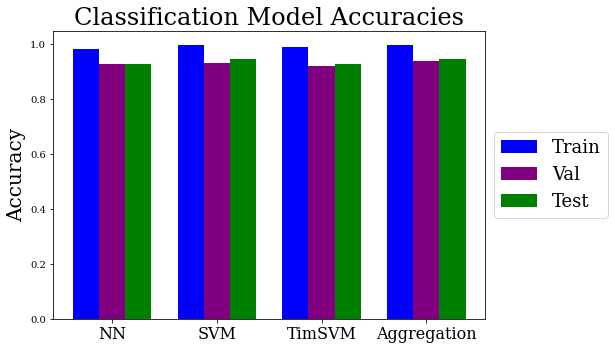

In [40]:
X = np.arange(4)
fig = plt.figure(figsize=(18,8),facecolor=(1, 1, 1))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(X+.25, [trainAcc1, trainAcc2, trainAcc3, trainAcc4],  color="blue",  width=.25, label="Train")
ax.bar(X+.5, [valAcc1, valAcc2, valAcc3, valAcc4],         color="purple", width=.25, label="Val")
ax.bar(X+.75, [testAcc1, testAcc2, testAcc3, testAcc4],    color="green",   width=.25, label="Test")

ax.set_title("Classification Model Accuracies", fontsize=24)
#ax.set_xlabel("Model", fontsize=20)
ax.set_ylabel("Accuracy", fontsize=20)
ax.set_xticks(X+.5)
ax.set_xticklabels(["NN", "SVM", "TimSVM", "Aggregation"], fontsize=16)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)

plt.savefig("../Figures/RegressionBar.jpg", bbox_inches='tight')